# Paso 1: Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Paso 2: Ejecutar extensión de faltantes

In [2]:
%run "/content/pandas_missing_extension.ipynb"

# Paso 3: Cargar el dataset

In [4]:
diabetes_df = pd.read_csv("/content/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Paso 4: Trabajamos con los nulos

In [5]:
diabetes_df.missing.number_missing()

0

**Generamos faltantes**

In [7]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.missing.number_missing()

652

**Graficamos los nulos**

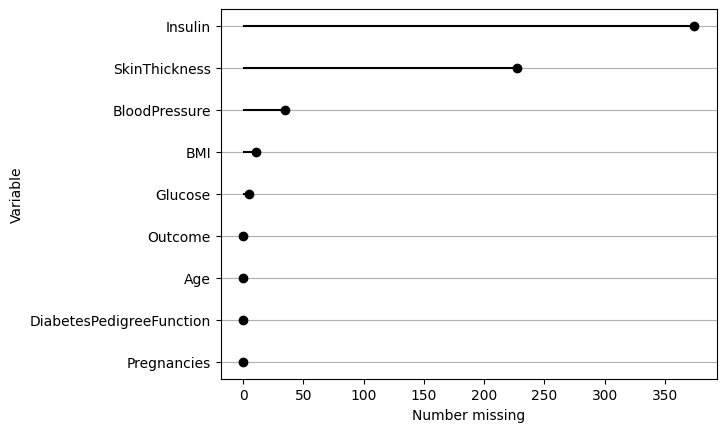

In [8]:
diabetes_df.missing.missing_variable_plot()

# Paso 5: Análisis de mecanismos de datos faltantes

## Datos Faltantes Completamente Aleatorios (MCAR)

**Missing Completely At Random**

<Axes: >

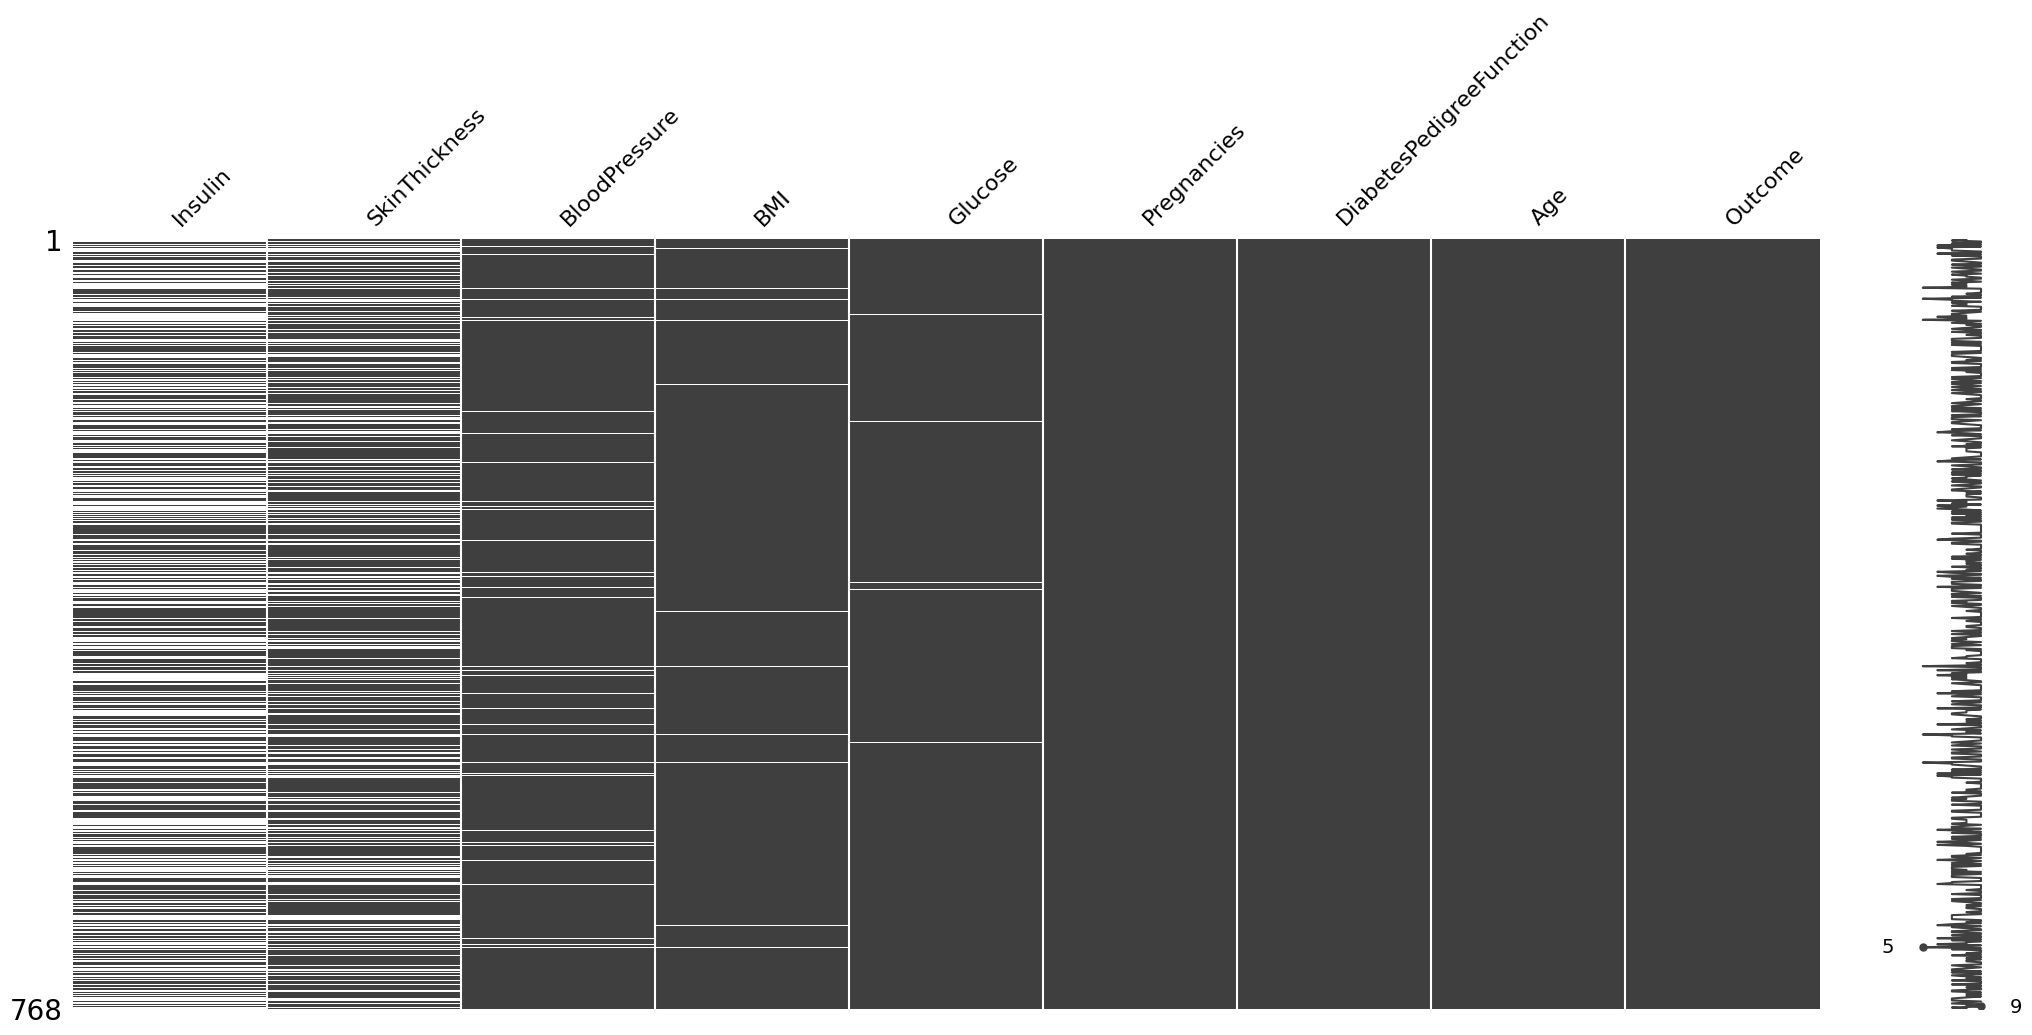

In [24]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

## Datos Faltantes Aleatorios (MAR)

**Missing At Random**

<Axes: >

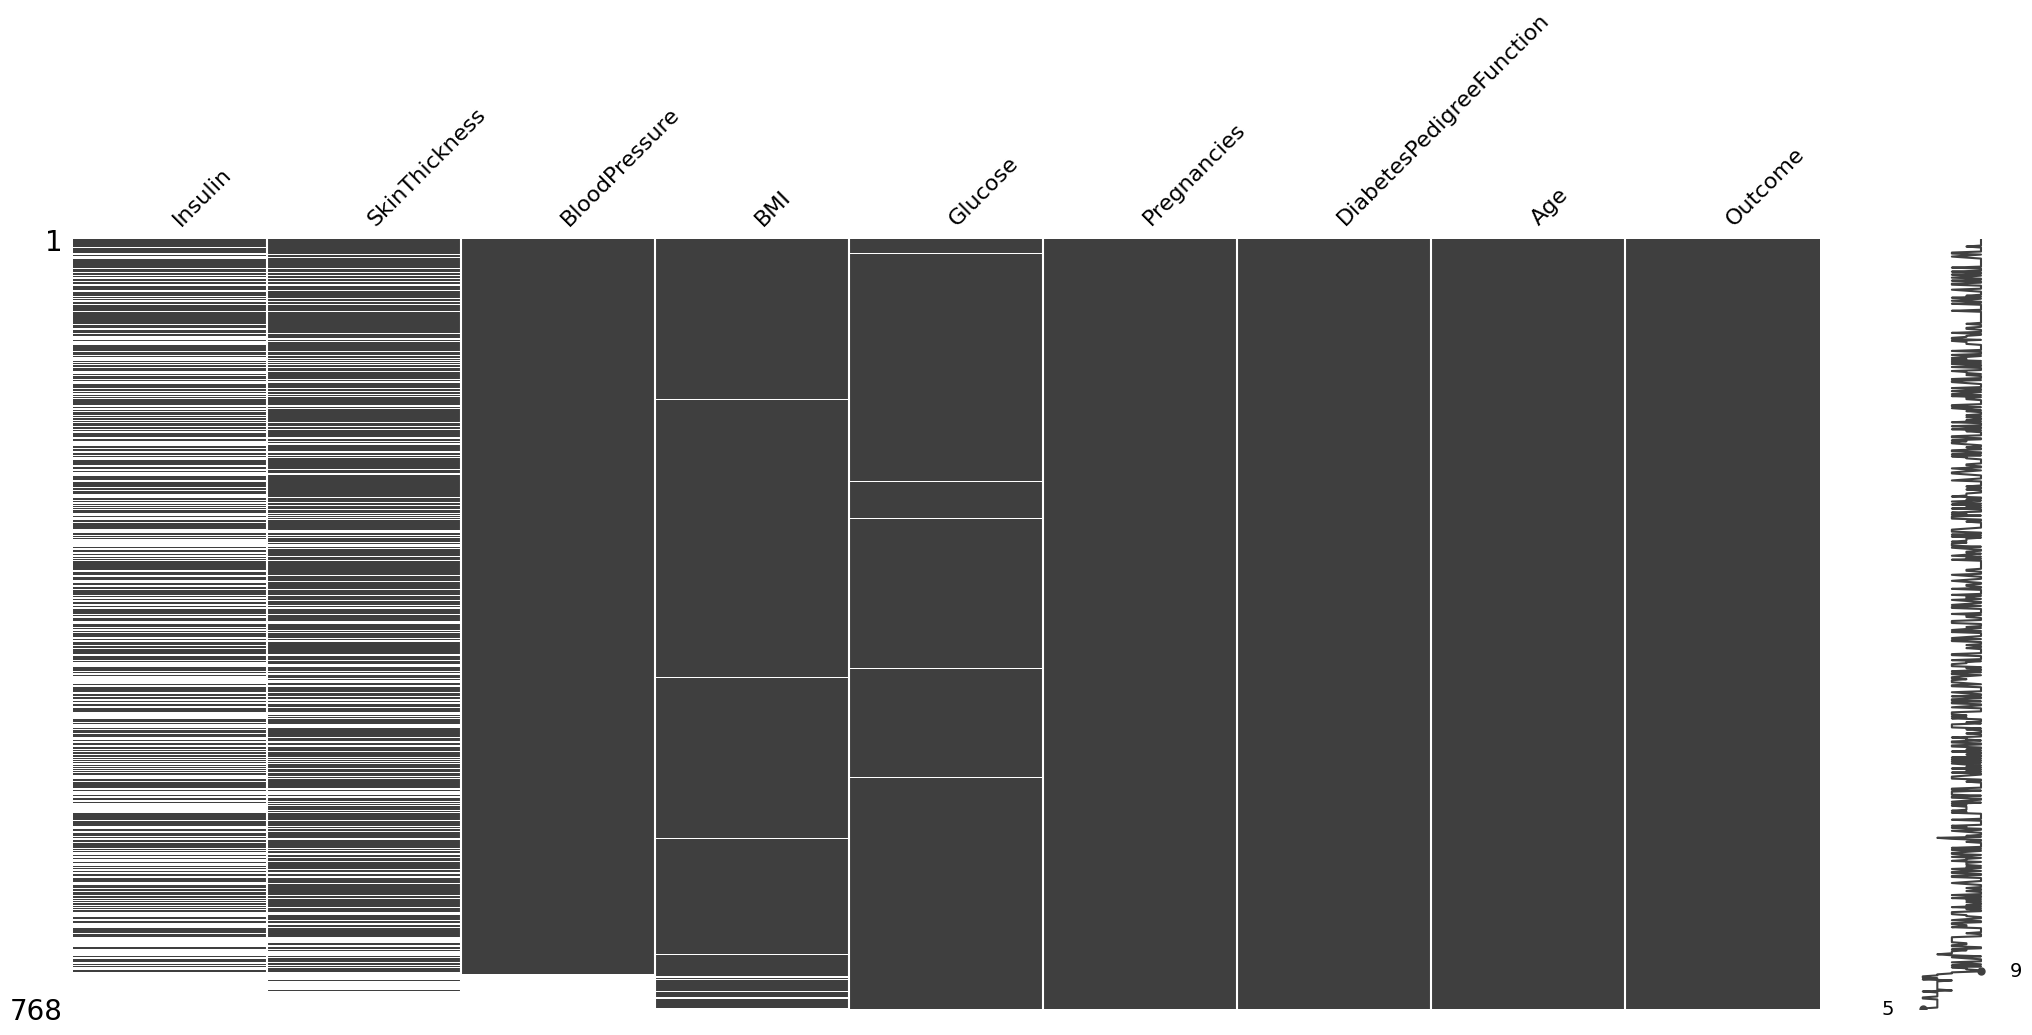

In [20]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="BloodPressure")
    .pipe(missingno.matrix)
)

## Datos Faltantes NO aleatorios (MNAR)

**Missing Not At Random**

<Axes: >

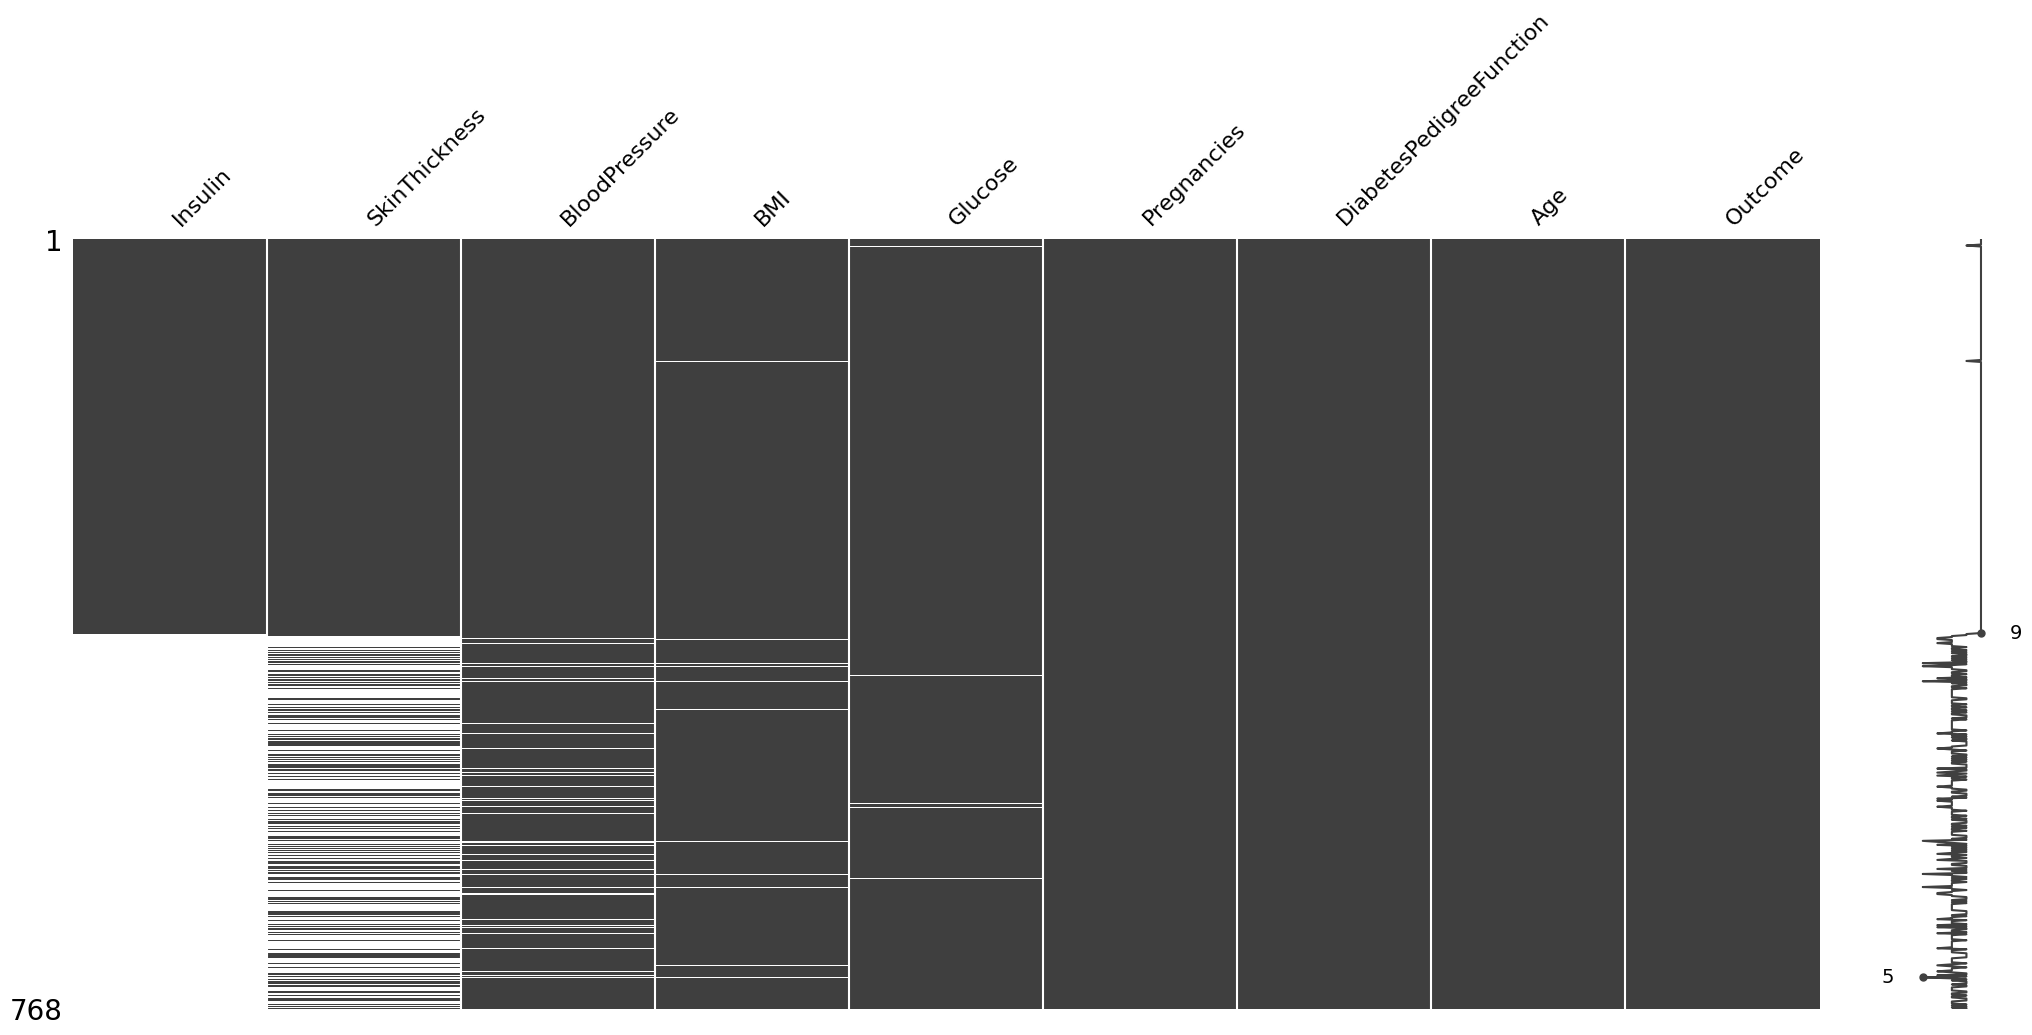

In [23]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="Insulin")
    .pipe(missingno.matrix)
)